---------------------
# Marketing Campaign Analysis
--------------------

We aim to analyze marketing data and address some important business problems/questions.

---------------------
## Context
--------------------

Marketing Analytics broadly refers to the practice of using analytical methods and techniques to understand the effectiveness of various marketing activities and deploy data-driven decisions to optimize for ROI on conversion rates. It typically involves analyzing various metrics around customer engagement with various marketing activities including but not limited to, ATL (above the line) marketing activities, BTL (below the line) campaigns, targeting personalized offers. Typically the variables of interest are customer profile, campaign conversion rates, and costs associated with various marketing channels. These can generate valuable insights that can help an organization form better marketing strategies, optimize/innovate on delivery, and achieve overall growth. 

---------------------
## Problem Statement
--------------------
Company 'All You Need' has hired you as a Data Scientist and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be and the conversion rate is very low.
Your task is to analyze the related data, understand the problem, and identify key insights and recommendations for the CMO to potentially implement.  

The data set marketing_data.csv consists of 2,240 customers of All You Need company with data on:

- Campaign successes/failures
- Product preferences
- Channel performances
- Customer profiles based on the spending habits

-------------------
## Data Dictionary
-------------------
- ID : Unique ID of each customer
- Year_Birth : Age of the customer
- Education : Customer's level of education
- Marital_Status : Customer's marital status
- Kidhome : Number of small children in customer's household
- Teenhome : Number of teenagers in customer's household
- Income : Customer's yearly household income
- Recency : Number of days since the last purchase
- MntFishProducts : The amount spent on fish products in the last 2 years
- MntMeatProducts : The amount spent on meat products in the last 2 years
- MntFruits : The amount spent on fruits products in the last 2 years
- MntSweetProducts : Amount spent on sweet products in the last 2 years
- MntWines : The amount spent on wine products in the last 2 years
- MntGoldProds : The amount spent on gold products in the last 2 years
- NumDealsPurchases : Number of purchases made with discount
- NumCatalogPurchases : Number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases : Number of purchases made directly in stores
- NumWebPurchases : Number of purchases made through the company's website
- NumWebVisitsMonth : Number of visits to company's website in the last month
- AcceptedCmp1 : 1 if customer accepted the offer in the first campaign, 0 otherwise 
- AcceptedCmp2 : 1 if customer accepted the offer in the second campaign, 0 otherwise
- AcceptedCmp3 : 1 if customer accepted the offer in the third campaign, 0 otherwise
- AcceptedCmp4 : 1 if customer accepted the offer in the fourth campaign, 0 otherwise
- AcceptedCmp5 : 1 if customer accepted the offer in the fifth campaign, 0 otherwise
- AcceptedCmp6 : 1 if customer accepted the offer in the last campaign, 0 otherwise 
- Complain : 1 If the customer complained in the last 2 years, 0 otherwise
- Country: Country customer belongs to

## Importing libraries and overview of the dataset

In [ ]:
# Library to supress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# from google.colab import files
# uploaded = files.upload()

### Load the dataset

In [ ]:
# loading the datset

df = pd.read_csv('Marketing data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,6,1,0,1,0,0,0,0,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,7,5,0,1,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,2,7,1,1,0,0,0,0,0,SP


### Check info of the dataset

In [ ]:
#Checking the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

**Observations:**
- There are a total of 27 columns and 2,240 observations in the dataset
- We can see that the Income column has less than 2,240 non-null values i.e. column has missing values. We'll explore this further


### Check the percentage of missing values for the Income column.

In [ ]:
# % Null values in the Income column

(df.isnull().sum()/df.shape[0]*100)['Income']

1.0714285714285714

**Observations:**
- Income has ~1.07% missing values.

### Create a list for numerical columns in the dataset and check the summary statistics 

### **Find the summary statistics for numerical columns and write your observations.**

In [ ]:
# num_cols contain numerical varibales 
num_cols=['Year_Birth','Income','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Kidhome',
       'Teenhome']

In [ ]:
# print descriptive statistics of numerical columns

# Uncomment the following code and fill in the blanks
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0


**Observations:**

1. Year_Birth - Assuming the reporting year is 2021 and the data ranges from 2019 to 2021 for two years according to the data dictionary. The customers born in 1996 birth-year customer would be 25 years old in 2021 - which is possible. But the customer born in 1893 with that min value would be aboslutely not right. We don't know how many birth-year may fall into any year before 1921, which indictes 100-year old above. We could use sort_value or other approchaes to find out how many potential reporting errors. 

2. Income - Frist the first - 24 records less than any other dataset, we need to be mindful. Since it is a small portion less than 1% of the whole dataset, We might just remove it later until we found any signifiant relations among those records. We have to look deeper to konw if it's US or global record of income. Assuming it's USA household income, the mean 52.2 K and the median 51.4K are all pretty low in comparison to Census.gov (https://www.census.gov/library/publications/2021/demo/p60-273.html#:~:text=Median%20household%20income%20was%20%2467%2C521,median%20household%20income%20since%202011.) Year 2019 60.6K and the year 2020 67.5K. The gap is around 13-16%. The customers "All you need" reached out are pretty lower-income customers or the states have lower average income per household. Will see later.

3. Recency - It indicates 49 days (both from mean or median), or 50% of the them ranging from 1-2.5 months (24-74 days). It's been quite a long time which people may not remember exactly the details sometimes. 

4. MntFishProducts, MntFruits, MntFruits, MntSweetProducts, MntWines : Those 5 categories spent in the past two years mean/median are pretty far away and it's all obviously mean is much larger than the median. All 5 are right-skweed/postive-skewed.

5. MntGoldProds - Not sure it means the real gold or a "marketing-term" gold product. The data loooks exactly like the previous 5 grocery categories - right skewed.

6. NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases - All 4 could be moderate skwed.

7. NumWebVisitsMonth could be moderate left-skewed.

8. Kidhome and Teenhome means falls at 0.4 and 0.5, which means it's very likely the definition of kid and teen here are "independent" (Say 0-12, 13-18) though we may sometimes refer kid as any under-18 in general. In totaly 0.9 kid per household is still reasonable becuase you have kids does mena they are at home. The 50 years old  and above customers very likely don't have kids/teens at home.

### Create a list for categorical columns in the dataset and check the count of each category

In [ ]:
# cat_cols contain categorical variables
cat_cols=['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp6', 'Complain', 'Country']

In [ ]:
# Print the count of each unique value in each column

for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 40)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64
----------------------------------------
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
YOLO        0.000893
Absurd      0.000893
Name: Marital_Status, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp3, dtype: float64
----------------------------------------
0    0.935714
1    0.064286
Name: AcceptedCmp4, dtype: float64
----------------------------------------
0    0.925446
1    0.074554
Name: AcceptedCmp5, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp1, dtype: float64
----------------------------------------
0    0.850893
1    0.149107
Name: AcceptedCmp2, dtype: float64
----------------------------------------
0    0.986607
1    0.013393
Name: AcceptedCmp6

**Observations:**
- In education, 2n cycle and Master means the same thing. We can combine these two categories.
- There are many categories in marital status. We can combine the category 'Alone' with 'Single'.
- It is not clear from the data that what do the terms 'Absurd', and 'YOLO' actually mean. We can combine these categories to make a new category - 'Others'.
- There are only 21 customers who complained in the last two years.
- The majority of the customers belong to Spain and least to Mexico.
- The most common educational status is Graduation
- The most common marital status is Married

## Data Preprocessing and Exploratory Data Analysis

Prepare our dataset for analysis.
- Fixing the categories
- Creating new columns as the total amount spent, total purchase made, total kids at home, and total accepted campaigns
- Dealing with missing values and outliers
- Extract key insights from the data

### Replace the "2n Cycle" category with "Master" in Education and "YOLO", "Alone", and "Absurd" categories with "Single" in Marital_Status

In [ ]:
# Replace 2n Cycle with Master

df["Education"].replace("2n Cycle", "Master", inplace=True)

In [ ]:
# Replace YOLO, Alone, Absurd with Single

df["Marital_Status"].replace(["Alone",], "Single", inplace=True)

In [ ]:
df['Marital_Status'].replace(["Absurd", "YOLO"], "Others", inplace=True)

We have fixed the categories in the Marital_Status. See the distribution count in different categories for marital status.

In [ ]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Others        4
Name: Marital_Status, dtype: int64

**Observation**:

- The majority of customer belong to married category and the other category have only 4 observations.

### Create new features from the existing features

In [ ]:
# create new features to get overall picture of a customer, how much he/she has spend, 
#how many children he/she has, total campaigns accepted, etc.


# total spending by a customer
spending_col = [col for col in df.columns if 'Mnt' in col]
df['Total_Spending'] = df[spending_col].sum(axis = 1) 

# total purchases made by a customer
platform_col = [col for col in df.columns if 'Purchases' in col]
df['Total_Purchase'] = df[platform_col].sum(axis = 1) 

# total no. of childern
df['NumberofChildren'] = df['Kidhome'] + df['Teenhome']  

# Total no. of campaign accepted by a customer
campaigns_cols = [col for col in df.columns if 'Cmp' in col]
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

Check outliers for new variables - Total_Spending, Total_Purchase. Analyze the Year_Birth column as we observed above that it had a minimum value of 1893.

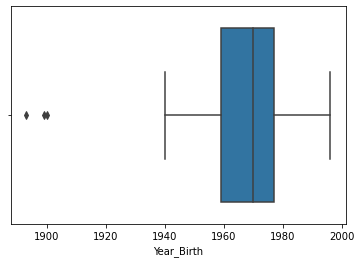

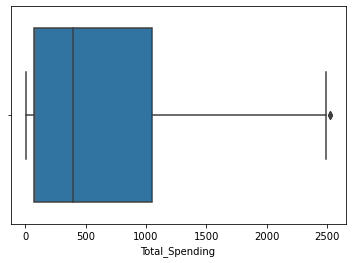

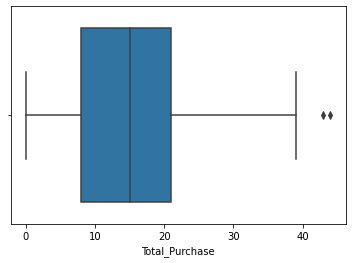

In [ ]:
# Plot boxplot for Year_Birth, Total_Spending, Total_Purchase

cols=['Year_Birth','Total_Spending','Total_Purchase']
for i in cols:
    sns.boxplot(x=df[i])
    plt.show()

**Observations:**
- The birth year is reported as <=1900 for some users, while the current year is 2021. it's very unlikely that the person is alive. it may be a reporting error.
- There are some outliers in total spending and total purchase. 
- The observations marked as outliers are very closed to the upper whisker and some extreme points can be expected for variables like total spending. We can leave these outliers untreated. 

Check the number of observations for which year birth is less than 1900. 

In [ ]:
df[df['Year_Birth'] < 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
513,11004,1893,Master,Single,60182.0,0,1,23,8,0,...,0,0,0,0,0,SA,22,4,1,0
827,1150,1899,PhD,Together,83532.0,0,0,36,755,144,...,1,0,0,0,0,SP,1853,15,0,1


**Observation**:
- There are only 2 observations for which birth year is less than 1900. We can drop these observations.

In [ ]:
# keep data for customers having birth year >1900

df = df[df['Year_Birth'] > 1900]

### Check the outliers and impute the missing values for the Income variable

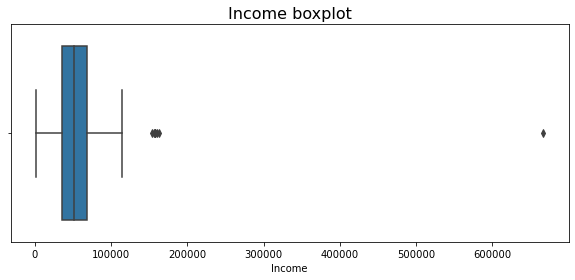

In [ ]:
# plot Boxplot for income

plt.figure(figsize=(10,4))
sns.boxplot(df['Income'])
plt.title('Income boxplot', size=16)
plt.show()

**Observations:**

- We can see from the boxplot that there are some outliers in the income variable.
- Find the value at upper whisker to check how many observations are marked as outliers.


In [ ]:
# Calculate the upper whisker for the Income variable

Q1 = df.quantile(q=0.25) #First quartile
Q3 = df.quantile(q=0.75) #Third quartile
IQR = Q3 - Q1            #Inter Quartile Range

upper_whisker = (Q3 + 1.5*IQR)['Income']   #Upper Whisker
print(upper_whisker)

118348.5


In [ ]:
# Check the observations marked as outliers
df[df.Income>upper_whisker]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
325,4931,1977,Graduation,Together,157146.0,0,0,13,1,0,...,0,0,0,0,0,SA,1730,28,0,0
497,1501,1982,PhD,Married,160803.0,0,0,21,55,16,...,0,0,0,0,0,US,1717,44,0,0
527,9432,1977,Graduation,Together,666666.0,1,0,23,9,14,...,0,0,0,0,0,SA,62,11,1,0
731,1503,1976,PhD,Together,162397.0,1,1,31,85,1,...,0,0,0,0,0,SP,107,1,2,0
853,5336,1971,Master,Together,157733.0,1,0,37,39,1,...,0,0,0,0,0,SP,59,2,1,0
1826,5555,1975,Graduation,Divorced,153924.0,0,0,81,1,1,...,0,0,0,0,0,SP,6,0,0,0
1925,11181,1949,PhD,Married,156924.0,0,0,85,2,1,...,0,0,0,0,0,CA,8,0,0,0
2204,8475,1973,PhD,Married,157243.0,0,1,98,20,2,...,0,0,0,0,0,IND,1608,37,1,0


**Observations**:

- We have only 8 observations with an income greater than the upper whisker. 
- Only 3 observations (ID- 4931, 1501, 8475) out of 8 outliers have purchased more than 11 times in the last 2 years.
- Other 5 observations have very less amount of total spending.

**Compare the summary statistics for these observations with observations on the other side of the upper whisker.**

In [ ]:
# Check the summary statistics for observations marked as outliers
df[df.Income>upper_whisker].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8.0,5989.250,3525.251308,1501.0,4074.00,5445.5,8714.25,11181.0
Year_Birth,8.0,1972.500,10.028531,1949.0,1972.50,1975.5,1977.00,1982.0
Income,8.0,221604.500,179850.404431,153924.0,157090.50,157488.0,161201.50,666666.0
Kidhome,8.0,0.375,0.517549,0.0,0.00,0.0,1.00,1.0
Teenhome,8.0,0.250,0.462910,0.0,0.00,0.0,0.25,1.0
Recency,8.0,48.625,33.687376,13.0,22.50,34.0,82.00,98.0
MntWines,8.0,26.500,30.798887,1.0,1.75,14.5,43.00,85.0
MntFruits,8.0,4.500,6.524678,0.0,1.00,1.0,5.00,16.0
MntMeatProducts,8.0,621.875,846.511402,1.0,7.25,17.0,1592.00,1725.0
MntFishProducts,8.0,4.250,5.650537,1.0,1.00,2.0,3.50,17.0


In [ ]:
# Check the summary statistics for observations not marked as outliers
df[df.Income<upper_whisker].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2205.0,5585.439456,3247.546423,0.0,2815.0,5455.0,8418.0,11191.0
Year_Birth,2205.0,1968.904308,11.705801,1940.0,1959.0,1970.0,1977.0,1996.0
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0


**Observations**:

- None of the outliers have accepted any of the campaigns or have submitted any complaints in the last 2 years.
- We can see that customers who are outliers have lower mean expenditure per customer for all the products except meat products.
- The outliers have a higher number of catalog purchases on average and very low number of web purchases.
- We can drop the 5 observations at indices [527, 731, 853, 1826, 1925] as they would not add value to our analysis.

In [ ]:
#Dropping 5 observations at indices 527, 731, 853, 1826, 1925
df.drop(index=[527, 731, 853, 1826, 1925], inplace=True)

### Check the distribution for Income

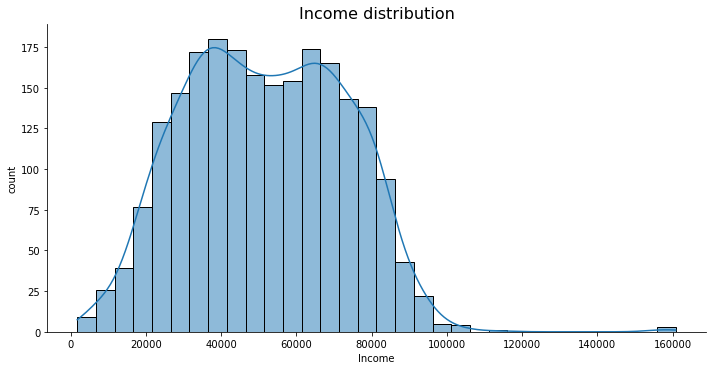

In [ ]:
# plot displot for income

sns.displot(df['Income'], kde=True, height=5, aspect=2)
plt.title('Income distribution', size=16, )
plt.ylabel('count');

**Observations:**

- After treating outliers, the distribution for the income variable is close to normal distribution with very few extreme observations to the right.
- We will replace the missing values for the income variable with the median, and not mean, as the variable is slightly skewed to the right

In [ ]:
#filling null values with median

df['Income'].fillna(df.Income.median(), inplace=True)

### Analyzing all the campaigns

#### Find out what is the acceptance rate for each campaign?

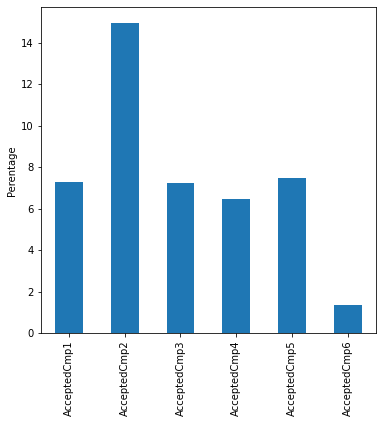

In [ ]:
# Plot the % acceptance for every campaign

Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

success_campaign=(df[Camp_cols].sum()/df.shape[0])*100

success_campaign.plot(kind='bar', figsize=(6,6))
plt.ylabel("Perentage")
plt.show()

**Observations:
1. The highest acceptance rate is from the Camp 2nd, which is around 15%. 
2. The lowest acceptance rate is from the camp 6th, which is round 1%.
3. For the accpetance rates of the rest of the campaigns on top of campaign 2nd and 6th are all ranging between 6 ~ 8%.
4. In the beginning of the description "you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be and the conversion rate is very low". We believe the 6th campain is the one CMO is not satisified with and CMO thinks the conversion rate 1% is very low. The "effective conversion rate" as they were expected to be is from the highest one 15% to the stable converate rate of campain 3rd to the 5th, which is around 7% around.
8. This marketing campain rate targets to various buying channels like web, catalog or store, we believe the rates (1% to 15%) from the data shown are reasonable in practice. **

### Analyze what kind of customer are accepting campaigns?

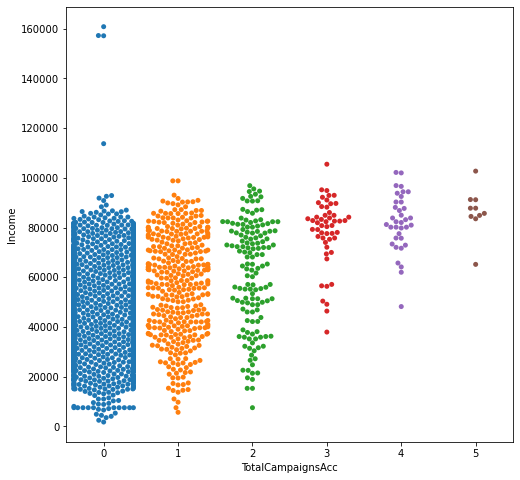

In [ ]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='TotalCampaignsAcc', y='Income', data=df)
plt.show()

**Observations:**
- Higher the income higher the number of campaigns accepted.

In [ ]:
# See the mean income of customers
df.Income.mean()

51762.59811827957

The mean income of customers is close to 52K. Divide the income into 2 segments of income>52k and income<52k and see the acceptance rate in each segment.

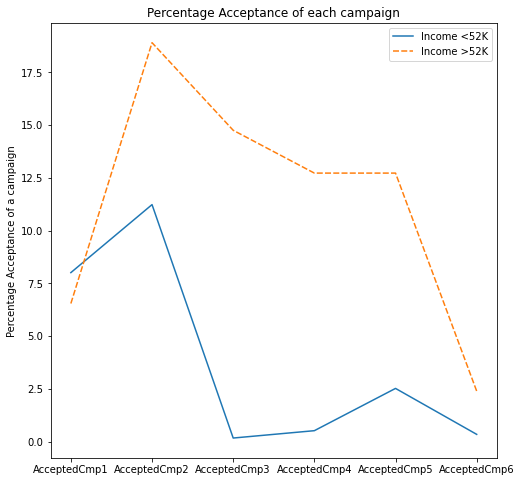

In [ ]:
# making dataframes of customers having income <52k and >52K
df1=df[df.Income<52000]
df2=df[df.Income>52000]

Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

# Calculate success rate of each campaign for both segments 
success_campaign1=pd.DataFrame((df1[Camp_cols].sum()/df1.shape[0])*100, columns=['Income <52K'])

success_campaign2=pd.DataFrame((df2[Camp_cols].sum()/df2.shape[0])*100, columns=['Income >52K'])

new_df=pd.concat([success_campaign1, success_campaign2], axis=1)

plt.figure(figsize=(8,8))
sns.lineplot(data=new_df)
plt.title("Percentage Acceptance of each campaign")
plt.ylabel("Percentage Acceptance of a campaign")
plt.show()

**Observations:**
1. Gap between two groups - First of all, from the gap between two groups: Income > 52K and Income < 52K, we observe there are huge differences in between in the campaign 2, 3, 4 and 5 to the 5th ranging from 7% to 14% (7%: 18% vs 11%, 14%: 14% vs 0%, 12%: 13% vs 11%, and 11%: 13% vs 12%). It indicaes higher income and lower income gives a strong difference in the contribution to the converion rate. The conversion rates in campaign 1 and 6 are with smaller differences between the groups.
2. Absolute conversion rates in the campaign - In the most successful campaign 2, both income groups shows the strongest conversion rate ever, which in dicates the campain is successful in both groups - but a much stronger one in the higher income groups.
3. The trend of the lower conversion rates - Though the higher income group supports solid rate in the most of the campagin, but in the campaign 6, both income groups shows very low conversion rate which is below 3%.
4. From the analysis above, we believe income could play a strong factor in the customer profile for the campaign success.**

Find out who has accepted the last campaign and what could be the reason?

In [ ]:
df[df['AcceptedCmp6']==1].shape

(30, 31)

- There are only 30 customers who have accepted the last campaign.
- Check if these customers are new or they have accepted previous campaigns as well.

In [ ]:
grouped2=df.groupby('AcceptedCmp6').mean()['TotalCampaignsAcc']
grouped2

AcceptedCmp6
0    0.404632
1    3.633333
Name: TotalCampaignsAcc, dtype: float64

**Observations:**
- We know that the maximum number of campaigns any customer has accepted is 5.
- We can observe that the value for TotalCampaignsAcc is ~3.6 for customers who have accepted the last campaign.
- This implies that these 30 customers are those loyal customers who have been accepting most of the campaigns.

### It could be that different campaigns are focussed on different set of products. Check if the product preference for those who accepted the campaigns is different from those who didn't - using amount spent and number of purchases

Define a function which will take the column name for the product as input and will generate the barplot for every campaign and average amount spent on a product

In [ ]:
def amount_per_campaign(columns_name):
    p1=pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    p2=pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    p3=pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    p4=pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    p5=pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    p6=pd.DataFrame(df.groupby(['AcceptedCmp6']).mean()[columns_name]).T
    pd.concat([p1,p2,p3,p4,p5,p6],axis=0).set_index([Camp_cols]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average amount spend on' + ' ' + columns_name)
    plt.show()

#### Use the function defined above to generate barplots for different purchasing Products

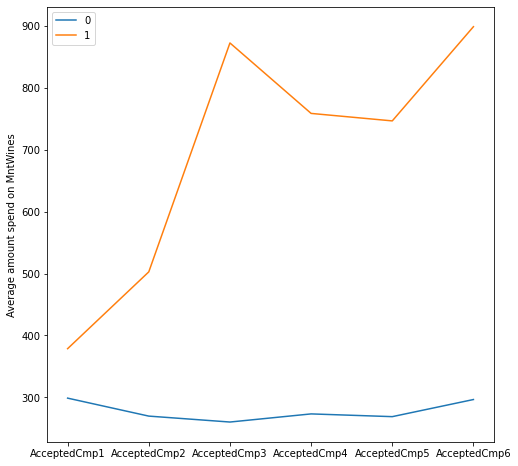

In [ ]:
# here is an example showing how to use this function on the column MntWines
amount_per_campaign('MntWines')

**Observations:**
- For the customers accepting campaign 3, 4, 5, and 6 the average amount spent on wine is quite high.

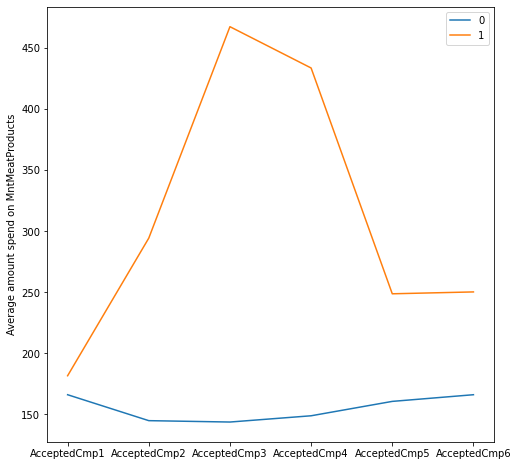

In [ ]:
# meat products

# call the function amount_per_campaign for MntMeatProducts
amount_per_campaign('MntMeatProducts')

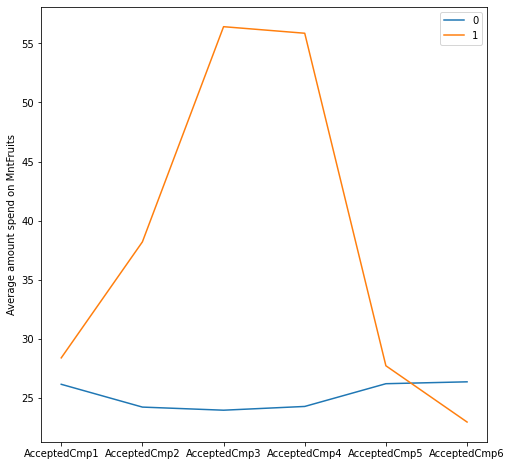

In [ ]:
# Fruit products

#call the function amount_per_campaign for MntFruits
amount_per_campaign('MntFruits')

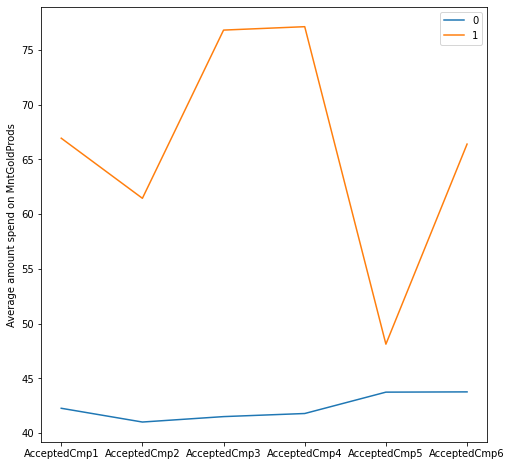

In [ ]:
# gold products

# call the function amount_per_campaign for MntGoldProds
amount_per_campaign('MntGoldProds')

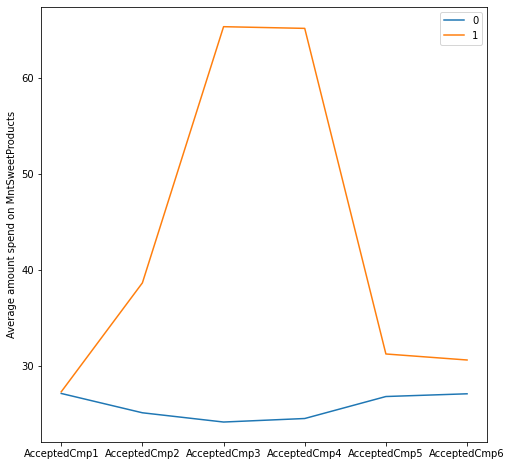

In [ ]:
# sweet products

# call the function amount_per_campaign for MntSweetProducts
amount_per_campaign('MntSweetProducts')

**Observations:**
1. Meat - Customers who accept the campaign show normally stonger purchase of meat products. It's obvious more purchase in campaign 2, 3, 4, 5 and 6 (Around 100%, 200%, 200%, 50% and 50% more) except campaign 1, which is not significant.
2. Fruit - Customers who accept the campaign show partially stonger purchase of fruit products. It's obvious more purchase in campaign 2, 3 and 4 (Around 50%, 130% and 130% more). But not sificiant in campaign 1 and 5. It's even less purchase in campain 6.
3. Gold - Customers who accept the campaign show normally stonger purchase of gold products. It's obvious more purchase in campaign 1, 2, 3, 4 and 6 (Around 50%, 50%, 80%, 80% and 50% more) except campaign 5, which is not significant.
4. Sweet - Customers who accept the campaign show normally stonger purchase of sweet products. It's obvious more purchase in campaign 2, 3, 4, 5 and 6 (Around 20%, 250%, 250%, 50% and 50% more) except campaign 1, which is no difference.
5. Overall, since customers who accept the campaign show cross-the-board stonger purchase of wine products (Around 30%, 80%, 200%, 160%, 160% and 200% more). In the customer profile, the customers who purchase wine products could play a very significant factor with influence in comparison to other products **

### We have analyzed the relationship between campaigns and different products. Now, See the relationship of campaigns with different purchasing channels.

We have a defined a function which will take the column name of the channel name as input and will generate the barplot for every campaign and average purchase made through that channel if the campaign is accepted

In [ ]:
def Purchases_per_campaign(columns_name):
    dp1=pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    dp2=pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    dp3=pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    dp4=pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    dp5=pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    dp6=pd.DataFrame(df.groupby(['AcceptedCmp6']).mean()[columns_name]).T
    pd.concat([dp1,dp2,dp3,dp4,dp5,dp6],axis=0).set_index([Camp_cols]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average' + ' ' + columns_name)
    plt.show()

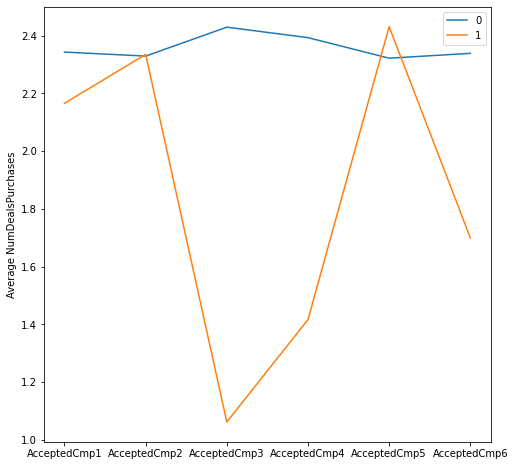

In [ ]:
# here is an example showing how to use this function on the column NumDealsPurchases
Purchases_per_campaign('NumDealsPurchases')

**Observations:**
- For the customers accepting campaign 3, 4, and 6 the average deals purchase is quite low.

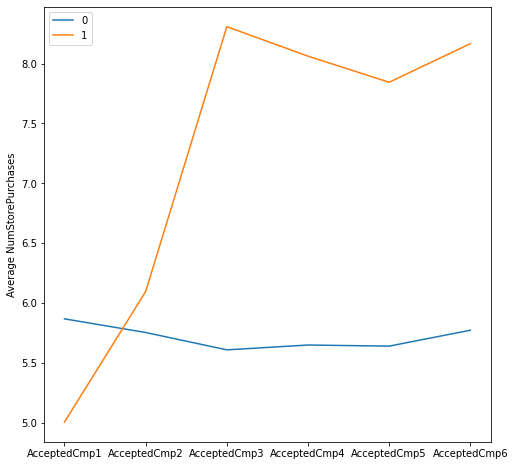

In [ ]:
# store purchase

# call the function Purchases_per_campaign for NumStorePurchases
Purchases_per_campaign('NumStorePurchases')

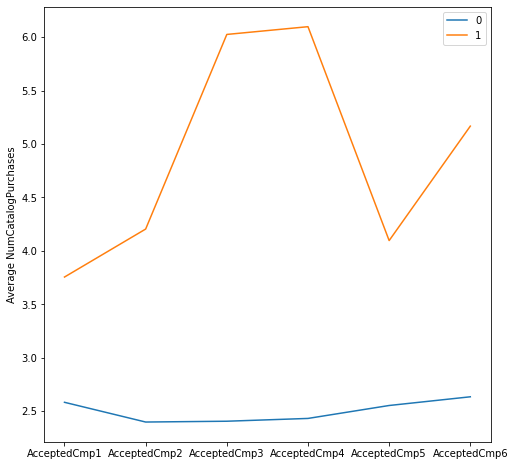

In [ ]:
#Catalog purchase

#call the function Purchases_per_campaign for NumCatalogPurchases
Purchases_per_campaign('NumCatalogPurchases')

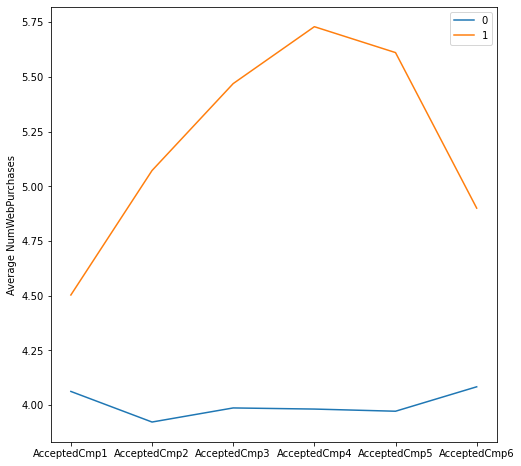

In [ ]:
# Web purchases

# call the function Purchases_per_campaign for NumWebPurchases
Purchases_per_campaign('NumWebPurchases')

**Observations:**
1. Store - For the customers accepting campaign 3, 4, 5 and 6 the average store purchase is quite good in the range of 7.5 ~ 8.5 times. But the average store purchase is less in the campaign 1 and not significant in the successful campain 2.
2. Catalog - For the customers accepting campaign, the average catalog purchase is good across the board. But in a dynamic range from 2.5 to 6.5 times
3. Web - For the customers accepting campaign, the average web purchase is good across the board. But in a dynamic range from 4.5 to 5.75 times.
4. Overall, the Deal and the store pruchase won't be considerable to help in customer profile due to inconsistency. It's potential to see if catalog and web purchase would be a factor to improve.**

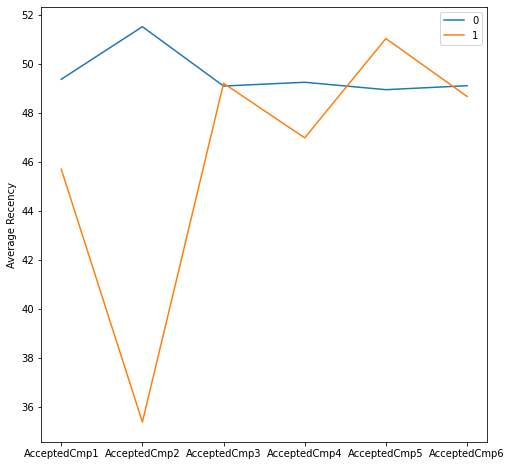

In [ ]:
#Recency

Purchases_per_campaign('Recency')

**Observations:**
- Average recency of the customers who accepted campaign 2 is quite low which implies that campaign 2 was accepted by the customers who recently purchased an item. 

#### We have analyzed the relationship between campaigns and numerical variables. See the relationship of campaigns with different categorical variables

We will check the percentage acceptance of each campaign with respect to each category in the categorical variable. The percentage acceptance is calculated as number of customers who have accepted the campaign to the total number of customers.

In [ ]:
def Cat_Campaign_Relation(df, column_name):
    e1=(df.groupby([column_name]).sum()['AcceptedCmp1']/df.groupby([column_name]).count()['AcceptedCmp1'])
    e2=(df.groupby([column_name]).sum()['AcceptedCmp2']/df.groupby([column_name]).count()['AcceptedCmp2'])
    e3=(df.groupby([column_name]).sum()['AcceptedCmp3']/df.groupby([column_name]).count()['AcceptedCmp3'])
    e4=(df.groupby([column_name]).sum()['AcceptedCmp4']/df.groupby([column_name]).count()['AcceptedCmp4'])
    e5=(df.groupby([column_name]).sum()['AcceptedCmp5']/df.groupby([column_name]).count()['AcceptedCmp5'])
    e6=(df.groupby([column_name]).sum()['AcceptedCmp6']/df.groupby([column_name]).count()['AcceptedCmp6'])
    df_new=pd.concat([e1,e2,e3,e4,e5,e6],axis=1).T
    plt.figure(figsize=(8,8))
    sns.lineplot(data=df_new, markers=True, linewidth=2)
    plt.ylabel('Percentage Acceptance')
    plt.show()

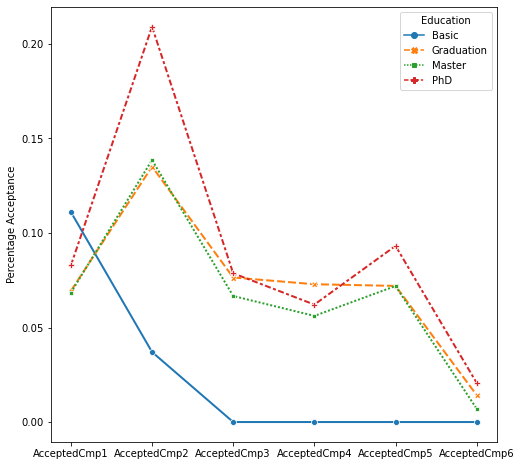

In [ ]:
# here is an example showing how to use this function on the column Education
Cat_Campaign_Relation(df, 'Education')

**Observations:**

- More than 20% of the customers with Ph.D have accepted campaign 2.
- Customers with basic education have only accepted campaign 1 and 2.
- Except customers with basic education level, all education levels follow the same trend.

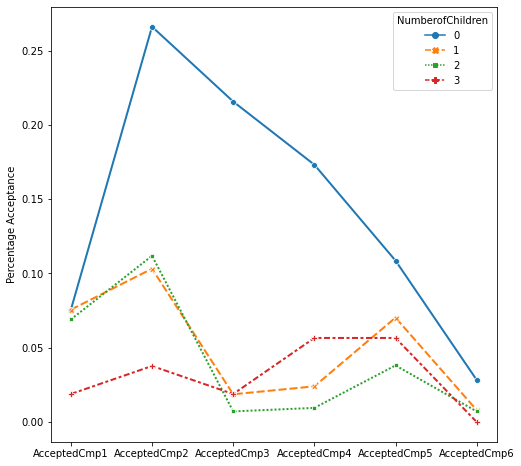

In [ ]:
# NumberofChildren

# call the function Cat_Campaign_Relation for NumberofChildren
Cat_Campaign_Relation(df, 'NumberofChildren')

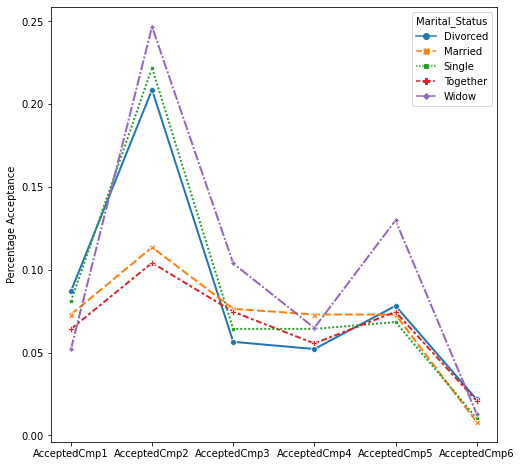

In [ ]:
# Filter the observations with 'Others' category as they are only 4 such observations
df_rest=df[df.Marital_Status!='Others']

# call the function Cat_Campaign_Relation for Marital_Status with dataframe df_rest
Cat_Campaign_Relation(df_rest, 'Marital_Status')

<AxesSubplot:ylabel='Country'>

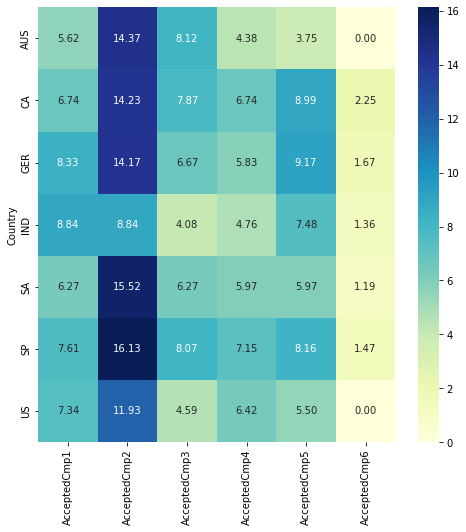

In [ ]:
# Filter the observations for 'ME' country as they are only 3 such observations
df_not_mexico=df[df.Country!='ME']

# Plot
plt.figure(figsize=(8,8))
sns.heatmap((df_not_mexico.groupby('Country').sum()[Camp_cols]/df_not_mexico.groupby('Country').count()[Camp_cols])*100, annot=True, fmt='0.2f', cmap="YlGnBu")

**Observation:**
1. Number of children - For the customers accepting campaigns, the average no children at home is across-the-board showing the highest converstion rate. We can't see any significant support or trend from the 1, 2, or 3 kids at home in the conversion rate.
2. Marital status - For the customers accepting campaign 2 and 6, the widow/single/divorced and widow show the strongest support in the conversion rate. But we can't see any specific marial status has a universal contribution difference for conversion rate.
3. Country - We don't see any country universally contributes the most in the conversion rate. We do see some campaign-wise support like "almost-across-the-board" stronger support in the campaign 6, but India has a gap with other countries. 
4. Overall, even including the first "education" facdtor, we can't conclude any universal profile factor to improve the marketing campaign from the 4 categories above. **

### Check the product preferences by customers

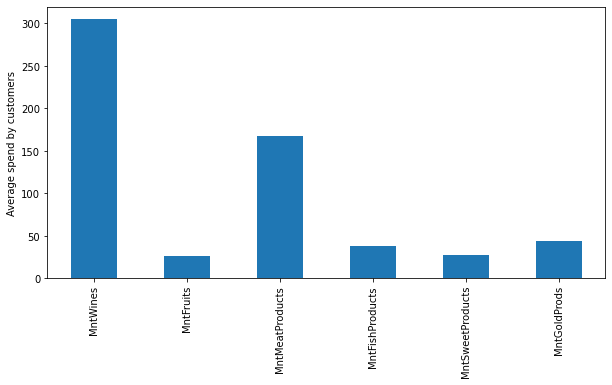

In [ ]:
# create a list which contains name of all products

mnt_cols = [col for col in df.columns if 'Mnt' in col]

spending=df[mnt_cols].mean(axis=0)
spending.plot(kind='bar', figsize=(10,5))
plt.ylabel("Average spend by customers")
plt.show()

**Observations**:

- The mean amount spent by customers in the last 2 years is highest for wines followed by meat products.

Check if the product preferences are similar for different types of customers. We will calculate the percentage amount spent by customers on a product for each category with respect to the total spending by customers belonging to that category.

In [ ]:
def amount_per_category(df, column_name):
    df_new1=((df.groupby([column_name]).sum()[mnt_cols].T)/df.groupby([column_name]).sum()['Total_Spending'])
    plt.figure(figsize=(10,8))
    sns.heatmap(df_new1.T, annot=True, cmap="YlGnBu")
    plt.show()

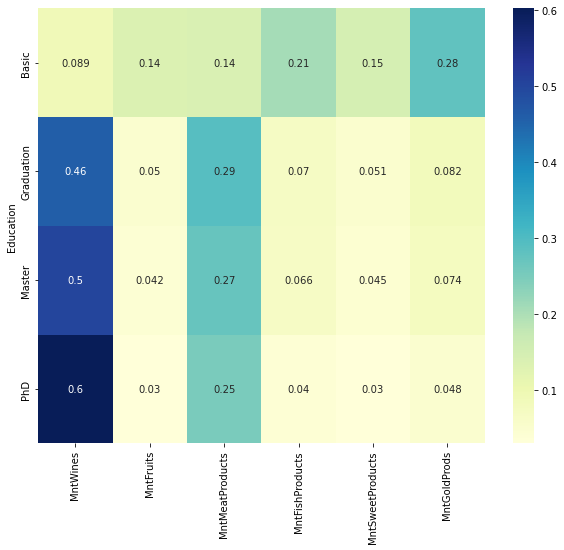

In [ ]:
# plot showing the percentage of total spending of different products by a group of customers having the same education level

amount_per_category(df, 'Education')

**Observations:**
- Customers with PhD spend ~60% of their total spending on wines.
- Customers with Graduation and Master's spend ~45-50% of their total spending on wines.
- Customers with Graduation and Master's spend ~27-29% of their total spending on meat.
- Customers with PhD spend ~25% of their total spending on meat.
- Customers having education level Master or PhD spend ~80% on meat and wines.
- Customers with basic education spend more on Fruits, Fish, Sweet, and Gold products.

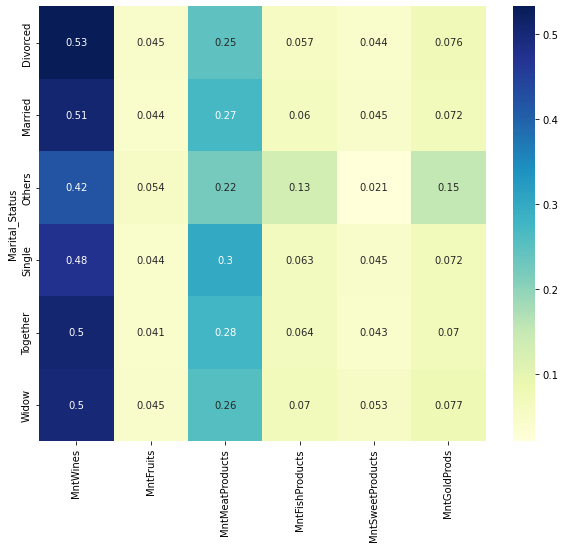

In [ ]:
# call the function amount_per_category for Marital_Status with dataframe df_rest
amount_per_category(df, 'Marital_Status')

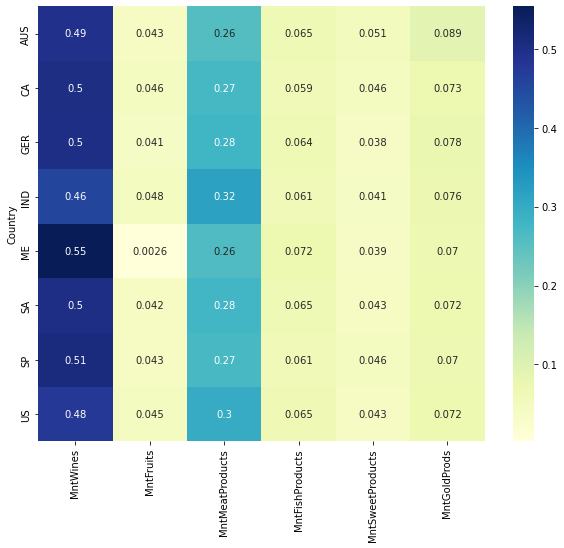

In [ ]:
#call the function amount_per_category for Country with dataframe df_not_mexico
amount_per_category(df, 'Country')

**Observations:**

1. Marital Status
- From the heat map, we could easily figure out: All the cusomters of various marital status spend their money among all categories are pretty much in the similar pattern - 48%-53% in wine, 41-45% in fruit, 25-28% in meat, 6-7% in fish, 4-5% in sweet and 70-77% in gold.
- The most special marital status customer type is "Others". They spend lower in wine (42%), meat (22%) and sweet (2%), but much higher in fruit(54%), and higher fish(13%) and gold (15%). 
2. Country
- From the heat map, India and Middle East two country-group customers show the strongest difference from other countries we had in the list.
- India country customers show the lowest (46%) spent in wine and the highest spent in the meat(32%). 
- Middle East country cutsomeers show the highest (55%) spent in wine and the lowest in both fruit (0%) and meat (26%).
3. Overall
- It's very significant that marital status or country may not the good factors to improve the customer profile, but it's across the board that any marital status or any coutnry all spend wine products with more than 46% of their all spending - which is very high.**

### Check different channel performances 

Calculate the percentage of purchases for all the channels.

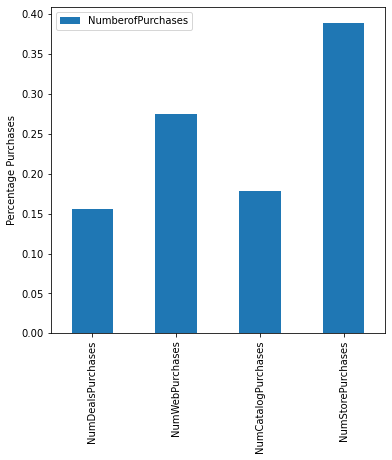

In [ ]:
# list of cols for channels

channel_cols = [col for col in df.columns if 'Purchases' in col] 

# make dataframe of columns having purchase and taking sum of them.
channels = pd.DataFrame(df[channel_cols].sum()/df.Total_Purchase.sum(), columns=['NumberofPurchases'])

# plot
channels.plot(kind='bar', figsize=(6,6))
plt.ylabel("Percentage Purchases")
plt.show()

**Observations**:

- We can see that the most purchases are from the stores followed by web purchases.
- Number of deal purchases and catalog purchases are low.

Check how number of purchases via different channels varies for different income bins.

In [ ]:
# Binning the income column
df['income_cat']=pd.qcut(df.Income, q=[0, 0.25, 0.50, 0.75, 1], labels=['low', 'medium', 'high', 'very_high'])

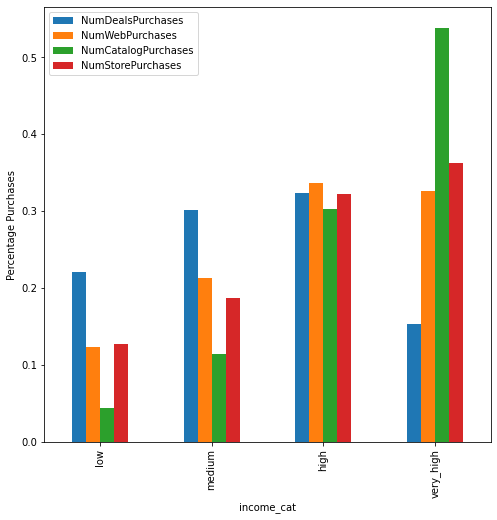

In [ ]:
group=df.groupby('income_cat').sum()[channel_cols]
(group/group.sum()).plot(kind='bar', figsize=(8,8))
plt.ylabel("Percentage Purchases")
plt.show()

**Observations:**
1. Not every channel shows the same pattern in the come category differences. Most of them (Store, Web and Category) show the similar pattern - the higher the income, the higher the percentage pruchase.
2. Deal Purchase shows a special pattern - In the income group of very high, the number of deal purchase is relatively low, even the lowest among the 4 income groups - while it's still increasing from the low, medium to the high when the income increases.
3. Catalog purchase shows a very strong tendency from the low to the very high income level with around 5%, 10%, 30% to 55% difference. **

### We can also visualize the correlation by purchases from different channels and income of the customer.

### **correlation matrix for the columns mentioned below and visualize the same using heatmap.**

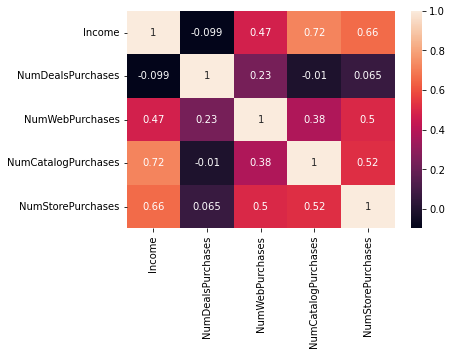

In [ ]:
corr=df[['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' ]].corr()

#Write your code here
sns.heatmap(corr, annot = True)
plt.show()

**Observations:**
1. The highest correlation we can see between the factors are the Income vs number of Catalog Purhcase (0.72), then Number of Store Purchases and Income (0.66) and Number of Store Purchases vs Number of Deal Purchases (0.65), it's quite good, but not strong enough to call it highly related.
2. The relationship between rest fo the factors are mild (among 0.23 to 0.52)
3. The most obviously factors which show very low correlations are income vs Number of deal Purhcase (-0.1). 
4. Overall, it's not too specific strong tendency among the groups.**

As we know from our analysis we have done so far that customers with income, number of children, and amount spending on wines are the important factors.  Try to come up with new customer profile on the basis of these 3 attributes and check what would be the acceptance rate for that customer profile.

In [ ]:
df3=df[df.Income>52000]
df4=df3[df3.MntWines>df3.MntWines.mean()]
new_profile=df4[df4.NumberofChildren==0]

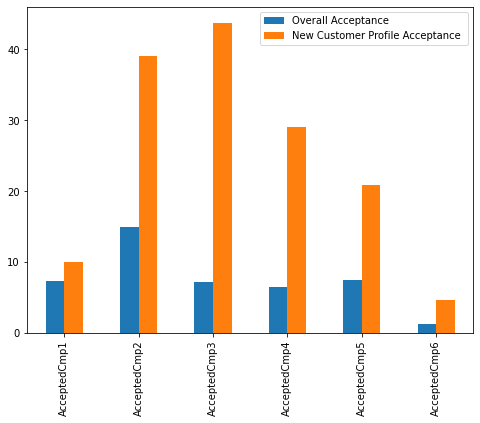

In [ ]:
# Calculate success rate of each campaign for both segments 
success_campaign3=pd.DataFrame(success_campaign, columns=['Overall Acceptance'])

success_campaign4=pd.DataFrame((new_profile[Camp_cols].sum()/new_profile.shape[0])*100, columns=['New Customer Profile Acceptance '])

# plot
pd.concat([success_campaign3, success_campaign4], axis=1).plot(kind='bar', figsize=(8,6))
plt.title("")
plt.ylabel("")
plt.show()

**Observations:**
- Orange bars in the plot indicates that acceptance rate would have been high for new customer profile i.e. income greater than the mean income, no kid at home, amount spent of wines is greater than the mean amount spent on wines.

## Conclusion and Recommendations

#Conclusions
1. With new customer profile with finetune in income, number of children, and amount spending on wines, which are the 3 important factors. We check what would be the acceptance rate for that customer profile has a huge improvement across teh board.
2. The improvement could be as high in the group of campaign 2, 3, 4 and 5 which have around net increase around 23%, 34% 22% and 13%. The mild group still shows improvment in the campaign 1 and 6 which have around net increase 2% and 5%.
3. The achievement is very significant since it's not easy for a marketing campaign to reach the overall above 20%. 30% even higher than 40% - which means almost 1/5 to 1/3 or above customers could react to conversion marketing expenditure to real purchase and sales revenue.
4. In terms of the growth of the improvement, it indicates from at-least-25% more in campaign 1 to up-to-400% more in campaign 6. It's a very significatn improvement in the marketing campaign result.
5. We do consider various factors, but pick up the most important 3 among all the analysis about what data provides the implication.

#Recommendations

Thanks for your valuable marketing data for us to conduct the data analysis about the related data, to understand the problem, and we do identify key insights and recommendations as follows:

1. Key ingihts - We do find out there are strong implications from the data with the potential to change the new customer profile to conduct the next successful marketing campaign. Higher income, the customers without kids at home and the strong inclination of spending on wine would be the significant key factors to support the new customer profile. After our testing, it could bring up acorss the board improvement in comaprison to the past 6 campaigns from net increase mild 2 ~ 5% increase to strong 13 ~ 34% net increase from the conversion rate point of view, or growth from 25% to 400% more.

2. Recommendations - We suggest to consider the cost of the updating with our 3 key suggesions to change customer profiles and conduct the next marketing campaign. We will expect a data-proof potential successful marekting campaign as mentioned above.